# Analyse de données - Yohan Ruffieux
## Singer_Graph

In [25]:
import pandas as pd

file_path = './data/Singer_Graph2.xlsx'

# read the Excel file
excel_file = pd.ExcelFile(file_path)

dfs = []

# for each sheet in the Excel file, read the data into a DataFrame
for sheet_name in excel_file.sheet_names:
    df = pd.read_excel(file_path, sheet_name=sheet_name)
    df['Type'] = sheet_name  # add a column to identify the type of data
    dfs.append(df)

# combine all the DataFrames into a single DataFrame
combined_df = pd.concat(dfs, ignore_index=True)

combined_df

,Risk,Host,Protocol,Port,Name,Synopsis,Solution,See Also,CVSS v3.0 Base Score,VPR Score,Type
0,Low,10.128.32.1,tcp,23,Telnet Server Detection,A Telnet server is listening on the remote port.,Disable this service if you do not use it.,NaN,NaN,NaN,Servers
1,NaN,10.128.32.1,tcp,0,Nessus Scan Information,This plugin displays information about the Nes...,NaN,NaN,NaN,NaN,Servers
2,Medium,10.128.32.1,tcp,23,Unencrypted Telnet Server,The remote Telnet server transmits traffic in ...,Disable the Telnet service and use SSH instead.,NaN,6.5,NaN,Servers
3,Low,10.128.32.1,tcp,22,SSH Server CBC Mode Ciphers Enabled,The SSH server is configured to use Cipher Blo...,Contact the vendor or consult product document...,NaN,3.7,3.6,Servers
4,Low,10.128.32.1,tcp,22,SSH Weak MAC Algorithms Enabled,The remote SSH server is configured to allow M...,Contact the vendor or consult product document...,NaN,NaN,NaN,Servers
...,...,...,...,...,...,...,...,...,...,...,...
3673,Low,10.128.134.139,tcp,22,SSH Server CBC Mode Ciphers Enabled,The SSH server is configured to use Cipher Blo...,Contact the vendor or consult product document...,NaN,3.7,3.6,Printers
3674,Low,10.128.134.139,tcp,22,SSH Weak MAC Algorithms Enabled,The remote SSH server is configured to allow M...,Contact the vendor or consult product document...,NaN,NaN,NaN,Printers
3675,Medium,10.128.134.139,udp,161,SNMP 'GETBULK' Reflection DDoS,The remote SNMP daemon is affected by a vulner...,Disable the SNMP service on the remote host if...,http://www.nessus.org/u?8b551b5c,NaN,3.6,Printers
3676,Critical,10.128.134.139,tcp,22,Dropbear SSH Server < 2016.72 Multiple Vulnera...,The SSH service running on the remote host is ...,Upgrade to Dropbear SSH version 2016.74 or later.,https://matt.ucc.asn.au/dropbear/CHANGES,9.8,5.9,Printers


Les colonnes à disposition sont les suivantes :

In [26]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Risk                  1874 non-null   object 
 1   Host                  3678 non-null   object 
 2   Protocol              3678 non-null   object 
 3   Port                  3678 non-null   int64  
 4   Name                  3678 non-null   object 
 5   Synopsis              3678 non-null   object 
 6   Solution              2385 non-null   object 
 7   See Also              2015 non-null   object 
 8   CVSS v3.0 Base Score  1537 non-null   float64
 9   VPR Score             668 non-null    float64
 10  Type                  3678 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 316.2+ KB


Suppression des colonnes qui me semblent inutiles pour l'analyse

In [27]:
df_opti = combined_df.drop(columns=["Synopsis", "Solution", "See Also"])

Un petit aperçu des valeurs vides dans le document :

In [28]:
df_opti.isnull().sum()

Risk                    1804
Host                       0
Protocol                   0
Port                       0
Name                       0
CVSS v3.0 Base Score    2141
VPR Score               3010
Type                       0
dtype: int64

In [29]:
df_opti.isnull().sum().sum()

np.int64(6955)

il y a un total de 6955 valeurs vides dans le document, je ne pense pas que c'est un problème dans notre cas. Les valeurs vide sont en général pour les colonnes des scores et du risque. On peut partir du principe que si ces valeurs sont vides, c'est qu'il n'y a pas de risque.

## Distribution de certaines valeurs

### Distribution des types de produits

<Axes: title={'center': 'Distribution of the type of product'}, xlabel='Type of product', ylabel='Number of Occurrences'>

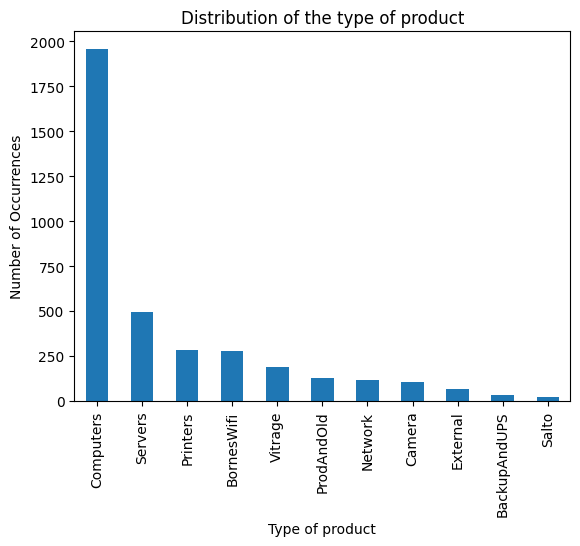

In [30]:
df_opti['Type'].value_counts().plot(kind='bar', title='Distribution of the type of product', xlabel='Type of product', ylabel='Number of Occurrences')

In [31]:
risk_colors = {
    'Low': '#00FF00',  # Green
    'Medium': '#FFFF00',  # Yellow
    'High': '#FF0000',  # Red
    'Critical': '#990000'  # Dark red
}

### Distribution des risques


<Axes: title={'center': 'Distribution of Risk'}, xlabel='Type of Risk', ylabel='Number of Occurrences'>

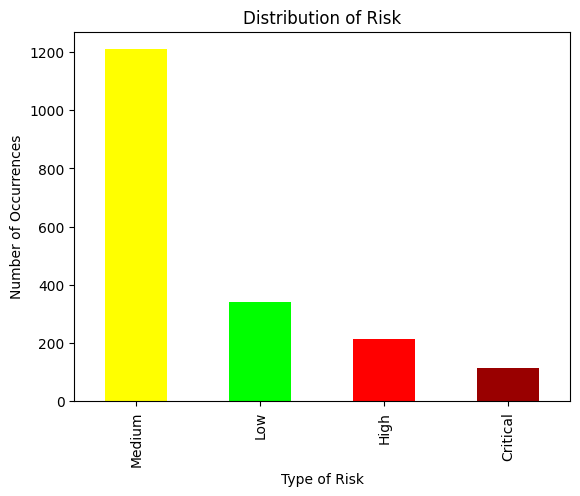

In [32]:
risk = df_opti['Risk'].value_counts()

colors = [risk_colors[r] for r in risk.index]
risk.plot(kind='bar', title='Distribution of Risk', xlabel='Type of Risk', ylabel='Number of Occurrences', color=colors)

#### Distribution des risques en pourcentage

<Axes: title={'center': 'Distribution of Risk'}>

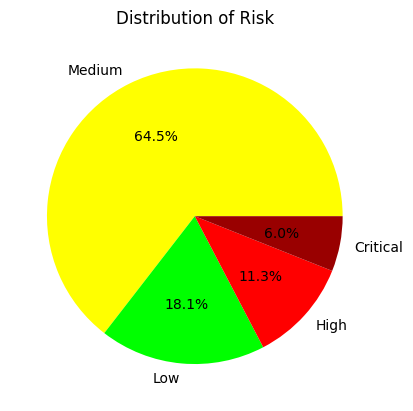

In [33]:
risk.plot(kind='pie', autopct='%1.1f%%', title='Distribution of Risk', ylabel='', colors=colors)

On peut voir qu'il y a une grande majorité d'alertes à risque moyen, mais il y a aussi un nombre non négligeable d'alertes à risque élevé et critique.

### Graphique de la distribution des risques par type de machine

In [34]:
risk_distribution = df_opti.groupby('Type')['Risk'].value_counts().unstack()
types = df_opti['Type'].unique()

<Axes: title={'center': 'Risk Distribution by Product Type'}, xlabel='Type of Product', ylabel='Number of Occurrences'>

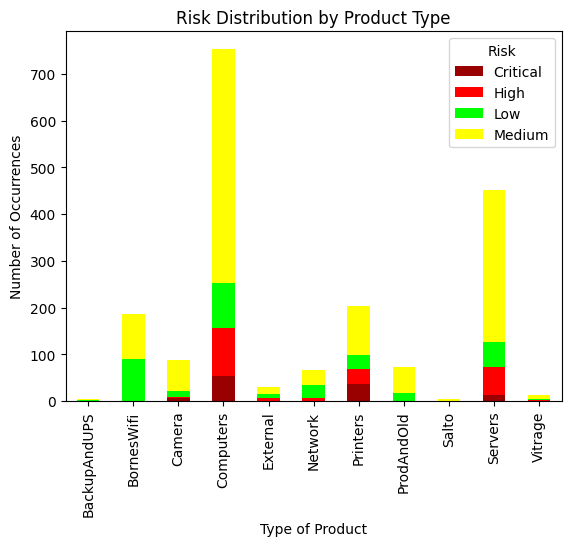

In [35]:
risk_distribution.plot(kind='bar', stacked=True, title='Risk Distribution by Product Type', xlabel='Type of Product', ylabel='Number of Occurrences', color=[risk_colors[r] for r in risk_distribution.columns])

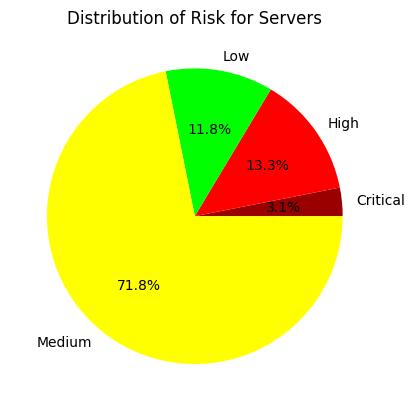

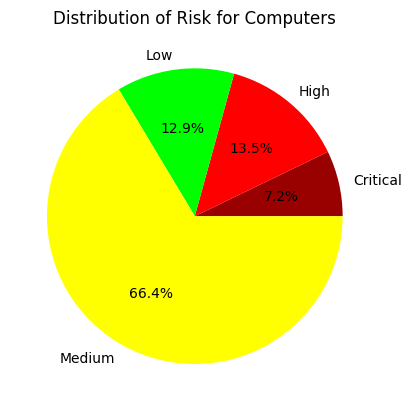

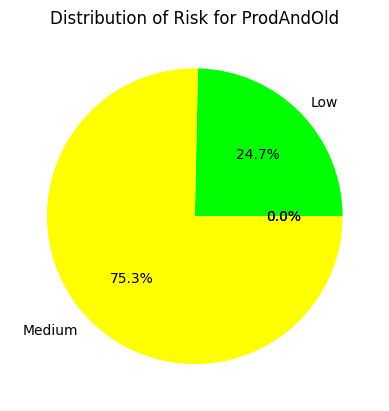

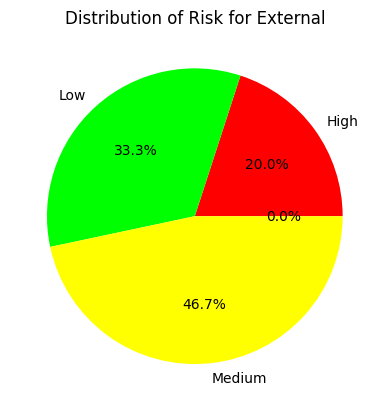

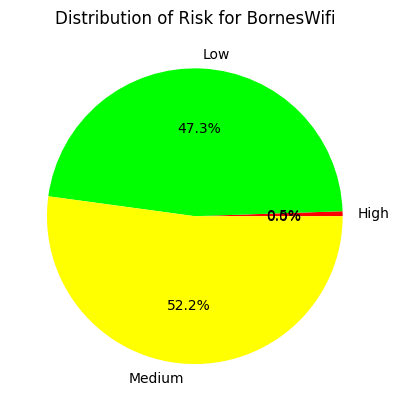

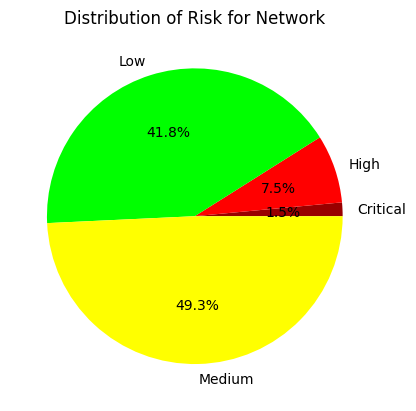

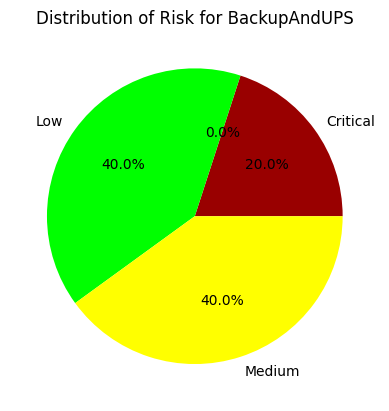

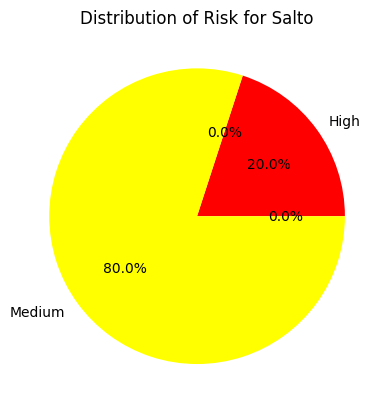

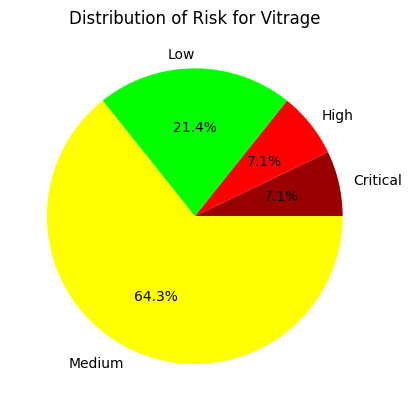

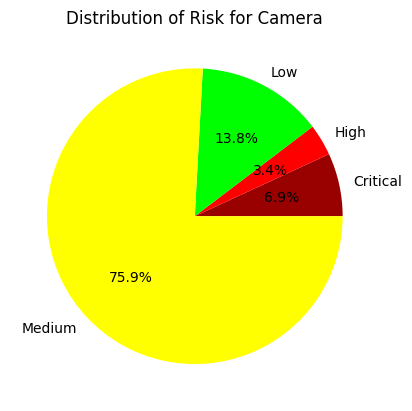

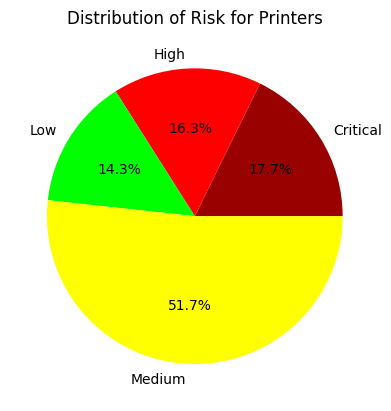

In [36]:
from matplotlib import pyplot as plt

for type in types:
    risk = risk_distribution.loc[type].fillna(0)
    colors = [risk_colors[r] for r in risk.index]
    risk.plot(kind='pie', autopct='%1.1f%%', title=f'Distribution of Risk for {type}', ylabel='', colors=colors)
    plt.show()

## Quelques statistiques
### Top 3 des types de machines avec le plus d'alertes

In [37]:
total_alerts = df_opti.groupby('Type')['Risk'].count()
total_alerts = total_alerts.sort_values(ascending=False)
for type, percentage in total_alerts.head(3).items():
    print(f'{type}: {percentage} alerts in total')
    

Computers: 753 alerts in total
Servers: 451 alerts in total
Printers: 203 alerts in total


### Top 3 des types de machines avec le plus d'alertes critiques en pourcentage

In [38]:
critical_alerts = df_opti[df_opti['Risk'] == 'Critical'].groupby('Type')['Risk'].count()
total_alerts = df_opti.groupby('Type')['Risk'].count()
critical_alerts_percentage = (critical_alerts / total_alerts).sort_values(ascending=False)
for type, percentage in critical_alerts_percentage.head(3).items():
    print(f'{type}: {percentage:.1%} of critical alerts')

BackupAndUPS: 20.0% of critical alerts
Printers: 17.7% of critical alerts
Computers: 7.2% of critical alerts


### Le top 3 des host avec le plus d'alertes

In [39]:
top_hosts = df_opti['Host'].value_counts().head(3)
top_hosts

Host
10.128.138.191    42
10.128.32.29      42
10.128.138.128    37
Name: count, dtype: int64

En voyant ça, on peut se dire qu'il faudrait regarder de plus près ces machines pour voir si il n'y a pas un problème de sécurité.

### Le top 3 des host avec le plus d'alertes critiques

In [40]:
top_hosts_critical = df_opti[df_opti['Risk'] == 'Critical']['Host'].value_counts().head(3)
top_hosts_critical

Host
10.128.138.191    5
10.128.138.155    5
10.128.137.92     3
Name: count, dtype: int64

En voyant ça, il faudrait vraiment regarder de plus près ces machines, pour voir les problèmes de sécurité qu'elles rencontrent.

### La distribution globale des scores CVSS et VPR
Rappel : plus on se rapproche de 10, plus le risque est élevé

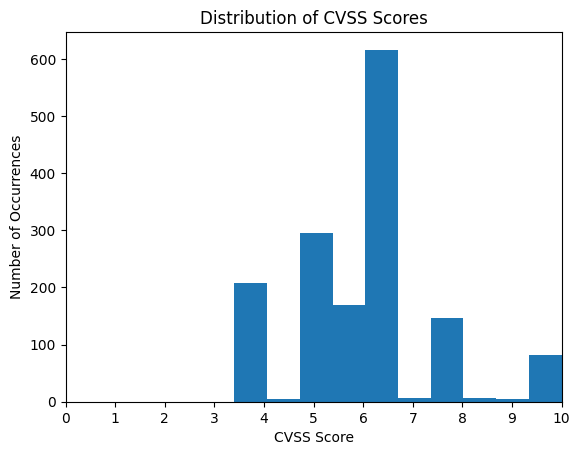

In [41]:
df_opti['CVSS v3.0 Base Score'].plot(kind='hist', title='Distribution of CVSS Scores', xlabel='CVSS Score',
                                     ylabel='Number of Occurrences')
plt.xlim(0, 10)
plt.xticks(range(0, 11))
plt.show()

In [42]:
df_opti['CVSS v3.0 Base Score'].mean()

np.float64(6.112231620039037)

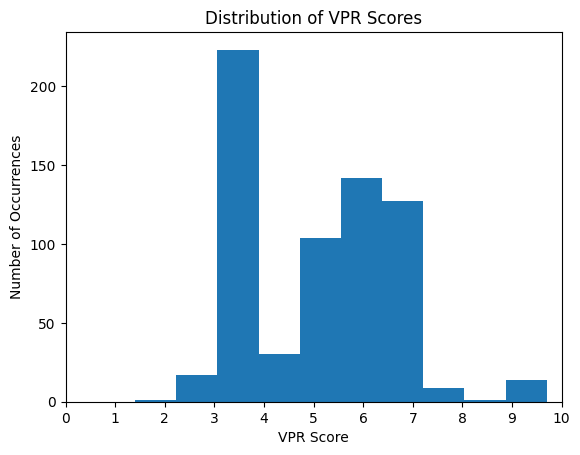

In [43]:
df_opti['VPR Score'].plot(kind='hist', title='Distribution of VPR Scores', xlabel='VPR Score',
                          ylabel='Number of Occurrences')
plt.xlim(0, 10)
plt.xticks(range(0, 11))
plt.show()

In [44]:
df_opti['VPR Score'].mean()

np.float64(5.135928143712574)

Avec un score moyen de 6.11 et 5.13, on peut dire que la majorité des alertes sont à un niveau de risque moyen. Ce qui est un score pas terrible, il faudrait avoir un score le plus bas possible dans l'idéal


### Le top 3 des ports qui provoquent le plus d'alertes

In [45]:
top_ports = df_opti['Port'].value_counts().head(3)
top_ports

Port
0       1315
3389     502
445      423
Name: count, dtype: int64

On peut voir que les ports 3389 et 445 provoquent le plus d'alertes, le port 0 je pense que c'est un port par défaut qui est utilisé pour les alertes qui ne sont pas liées à un port spécifique, donc c'est normal qu'il soit en tête de liste.

### Le top 3 des ports qui provoquent le plus d'alertes critiques

In [46]:
top_ports_critical = df_opti[df_opti['Risk'] == 'Critical']['Port'].value_counts().head(3)
top_ports_critical

Port
161     32
0       22
9000    10
Name: count, dtype: int64

On peut conclure que les ports 161 et 9000 sont les plus critiques, et qu'il faudra vraiment faire attention à bien sécuriser ces ports.

In [48]:
import os
os.system('jupyter nbconvert --to markdown Singer_Graph_Analyse.ipynb')

0